In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
results = pd.read_csv("C:/Users/Fatemeh/Desktop/Covid Project/F1 analysis/F1-Data-Analysis-master/csv_files/results.csv", names = ['result_id','race_id','driver_id','constructor_id','number','grid','position', 'position_text','position_order','points','laps', 'time', 'milliseconds','fastest_lap','rank','fastest_lap_time','fastest_lap_speed', 'status_id'], header = None)
races = pd.read_csv("C:/Users/Fatemeh/Desktop/Covid Project/F1 analysis/F1-Data-Analysis-master/csv_files/races.csv", names = ['race_id','year', 'round', 'circuit_id','name', 'date', 'time', 'url'], header = None)
drivers = pd.read_csv("C:/Users/Fatemeh/Desktop/Covid Project/F1 analysis/F1-Data-Analysis-master/csv_files/drivers.csv", names =['driver_id','driver_ref', 'number', 'code', 'forename','surname', 'dob', 'nationality', 'url'], header = None)
constructors = pd.read_csv("C:/Users/Fatemeh/Desktop/Covid Project/F1 analysis/F1-Data-Analysis-master/csv_files/constructors.csv", names =['constructor_id','constructor_ref', 'name', 'nationality', 'url'], header = None)
constructors.head(5)

,constructor_id,constructor_ref,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [3]:
df = pd.merge(results, races[['race_id', 'year', 'name', 'round']], on ='race_id', how = 'left')
df = pd.merge(df, drivers[['driver_id', 'driver_ref', 'nationality']], on = 'driver_id', how='left')
df = pd.merge(df, constructors[['constructor_id', 'name', 'nationality']], on ='constructor_id', how ='left')


In [4]:
# Drop columns
df.drop(['number', 'position', 'position_text', 'laps','fastest_lap', 'status_id', 'result_id','race_id', 'driver_id','constructor_id'], axis =1, inplace =True)

In [5]:
# Rename columns
df. rename(columns = {'rank': 'fastest_lap_rank', 'name_x': 'gp_name','nationality_x': 'driver_nationality', 'name_y': 'constructor_name','nationality_y': 'constructor_nationality', 'driver_ref': 'driver'}, inplace =True)

In [6]:
# Rearrange columns
df = df[['year', 'gp_name', 'round', 'driver', 'constructor_name','grid','position_order','points','time','milliseconds', 'fastest_lap_rank', 'fastest_lap_time','fastest_lap_speed','driver_nationality', 
        'constructor_nationality']]

In [7]:
# Drop season 2019

df = df[df['year']!= 2019]

In [8]:
# Sort the values

df = df.sort_values(by = ['year', 'round', 'position_order'], ascending =[False, True, True])

In [9]:
# Replace \N values in time column

df.time.replace ('\\N', np.nan, inplace =True)
df.milliseconds.replace ('\\N', np.nan, inplace =True)
df.fastest_lap_rank.replace ('\\N', np.nan, inplace =True)
df.fastest_lap_time.replace ('\\N', np.nan, inplace =True)
df.fastest_lap_speed.replace ('\\N', np.nan, inplace =True)

In [10]:
# Change data type

df.fastest_lap_speed = df.fastest_lap_speed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds= df.milliseconds.astype(float)

In [14]:
# Reset index

df.reset_index(drop =True, inplace = True)

In [15]:
df.shape

(24200, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24200 entries, 0 to 24199
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     24200 non-null  int64  
 1   gp_name                  24200 non-null  object 
 2   round                    24200 non-null  int64  
 3   driver                   24200 non-null  object 
 4   constructor_name         24200 non-null  object 
 5   grid                     24200 non-null  int64  
 6   position_order           24200 non-null  int64  
 7   points                   24200 non-null  float64
 8   time                     6205 non-null   object 
 9   milliseconds             6204 non-null   float64
 10  fastest_lap_rank         5951 non-null   float64
 11  fastest_lap_time         5782 non-null   object 
 12  fastest_lap_speed        5782 non-null   float64
 13  driver_nationality       24200 non-null  object 
 14  constructor_nationalit

([], [])

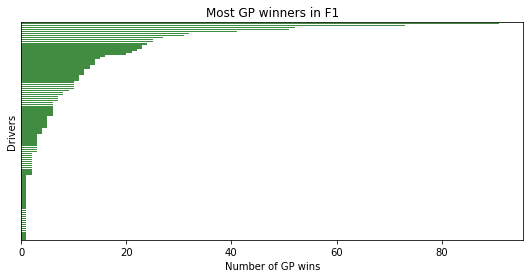

In [31]:
# GP winners

driver_winner= df.loc[df['position_order']==1].groupby('driver')['position_order'].count().sort_values(ascending = False).to_frame().reset_index()

fig = plt.figure(figsize=(9,4))
sns.barplot(data = driver_winner, y= 'driver', x= 'position_order', color ='green', alpha =0.8)
plt.title('Most GP winners in F1')
plt.xlabel('Number of GP wins')
plt.ylabel('Drivers')
plt.yticks([])

In [33]:
# Top 10 drivers

top10drivers = driver_winner.head(10)
top10drivers

,driver,position_order
0,michael_schumacher,91
1,hamilton,73
2,vettel,52
3,prost,51
4,senna,41
5,alonso,32
6,mansell,31
7,stewart,27
8,clark,25
9,lauda,25


Text(0.5, 0, 'Number of GP wins')

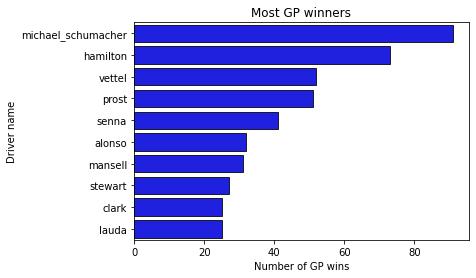

In [36]:
# Bar Plot

sns.barplot(data = top10drivers, y='driver', x='position_order', color ='blue', linewidth=0.8, edgecolor = 'black')
plt.title('Most GP winners')
plt.ylabel('Driver name')
plt.xlabel('Number of GP wins')

([], [])

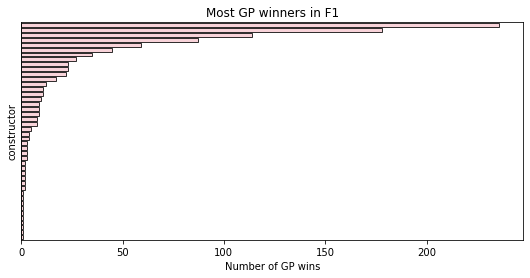

In [40]:
constructor_winner= df.loc[df['position_order']==1].groupby('constructor_name')['position_order'].count().sort_values(ascending = False).to_frame().reset_index()

fig = plt.figure(figsize=(9,4))
sns.barplot(data = constructor_winner, y= 'constructor_name', x= 'position_order', color ='pink', edgecolor = 'black', alpha =0.8)
plt.title('Most GP winners in F1')
plt.xlabel('Number of GP wins')
plt.ylabel('constructor')
plt.yticks([])

In [41]:
Top10Constructors = constructor_winner.head(10)
Top10Constructors

,constructor_name,position_order
0,Ferrari,236
1,McLaren,178
2,Williams,114
3,Mercedes,87
4,Red Bull,59
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Tyrrell,23
9,Brabham,23


Text(0.5, 1.0, 'Most winner constructors')

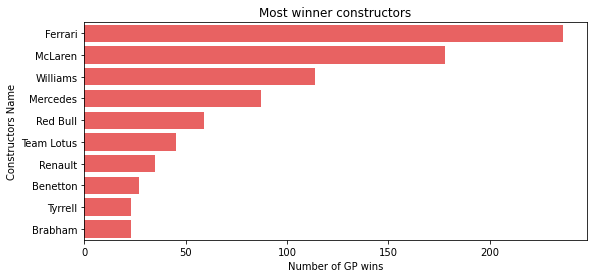

In [47]:
fig = plt.figure(figsize=(9,4))
sns.barplot(data = Top10Constructors, y ='constructor_name', x = 'position_order', color = 'red', alpha =0.7)
plt.xlabel('Number of GP wins')
plt.ylabel('Constructors Name')
plt.title('Most winner constructors')

Text(0, 0.5, 'finish Place')

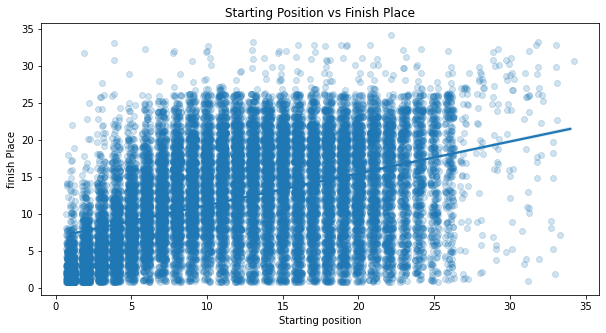

In [61]:
# regression Plot

df_no_zero= df[df['grid']!= 0]

plt.figure(figsize=(10,5))
sns.regplot(data = df_no_zero, y='grid', x='position_order', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha' : 1/5})
plt.title('Starting Position vs Finish Place')
plt.xlabel('Starting position')
plt.ylabel('finish Place')

Text(0.5, 0.98, 'Average sped amongst all teams during the fastest lap at individual GPs')

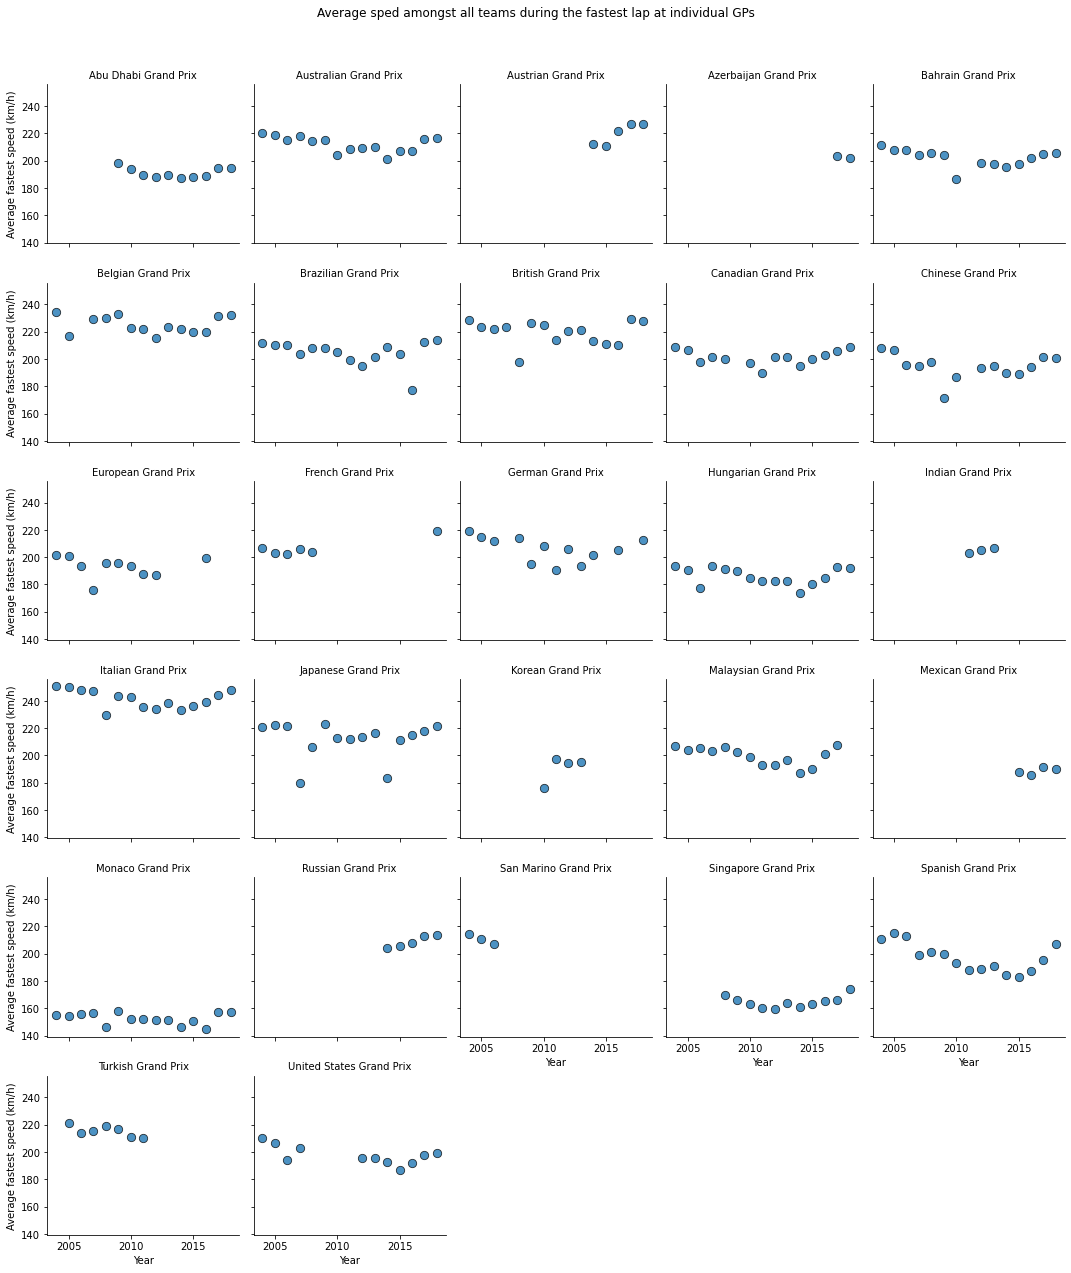

In [77]:
df_speed=df[df['year']>= 2004]

df_group_speed = df_speed.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

g = sns.FacetGrid(data=df_group_speed, col ='gp_name', col_wrap=5)
g.map(plt.scatter, 'year', 'fastest_lap_speed', alpha=0.8, linewidth=0.8, edgecolor='black', s=70)
g.set_titles('{col_name}')
g.set_xlabels("Year")
g.set_ylabels("Average fastest speed (km/h)")
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average sped amongst all teams during the fastest lap at individual GPs')